In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image

In [52]:
# # To add your own Drive Run this cell.
# from google.colab import drive

# drive.mount("/content/drive")

In [53]:
######################################################################
# OneLayerNetwork
######################################################################


class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        IMAGE_DIM = 28 * 28
        NUM_LABELS = 3
        self.linear = torch.nn.Linear(IMAGE_DIM, NUM_LABELS)

        ### ========== END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== START ========== ###
        ### part d: implement the foward function
        outputs = self.linear(x)

        ### ========== END ========== ###
        return outputs

In [54]:
######################################################################
# TwoLayerNetwork
######################################################################


class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        IMAGE_DIM = 28 * 28
        HIDDEN_DIM = 400
        NUM_LABELS = 3
        self.linear_1 = torch.nn.Linear(IMAGE_DIM, HIDDEN_DIM)
        self.linear_2 = torch.nn.Linear(HIDDEN_DIM, NUM_LABELS)

        ### ========== END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== START ========== ###
        ### part g: implement the foward function
        x = torch.relu(self.linear_1(x))
        outputs = self.linear_2(x)

        ### ========== END ========== ###
        return outputs

In [55]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [56]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x * 255)
    plt.figure()
    plt.imshow(img)
    return

In [57]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [58]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions == batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [59]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== START ========== ###
            ### part f: implement the training process
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            ### ========== END ========== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(
            f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |"
        )

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

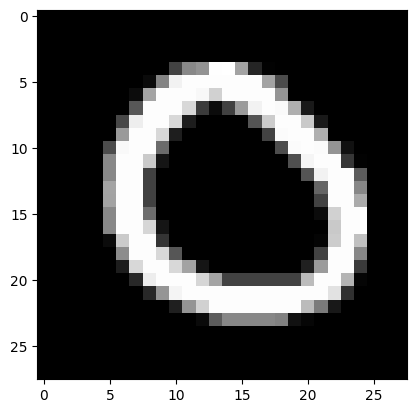

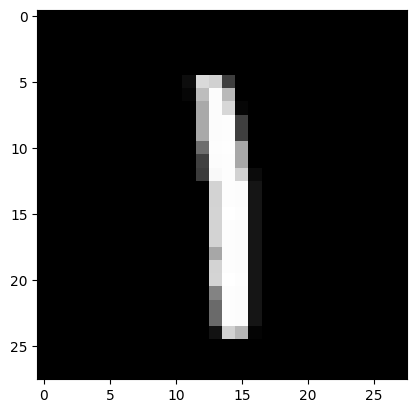

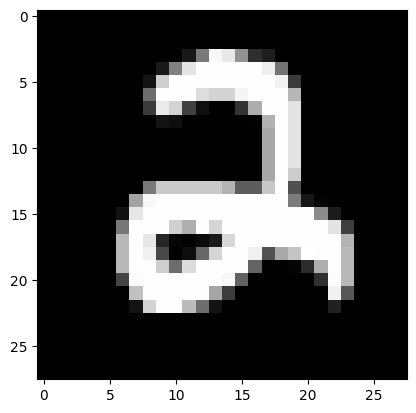

Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075380 | train acc 0.453333 | valid loss 1.084895 | valid acc 0.453333 |
| epoch  2 | train loss 1.021195 | train acc 0.553333 | valid loss 1.030888 | valid acc 0.553333 |
| epoch  3 | train loss 0.972527 | train acc 0.626667 | valid loss 0.982578 | valid acc 0.593333 |
| epoch  4 | train loss 0.928296 | train acc 0.710000 | valid loss 0.938814 | valid acc 0.640000 |
| epoch  5 | train loss 0.887846 | train acc 0.783333 | valid loss 0.898887 | valid acc 0.700000 |
| epoch  6 | train loss 0.850737 | train acc 0.826667 | valid loss 0.862347 | valid acc 0.753333 |
| epoch  7 | train loss 0.816550 | train acc 0.850000 | valid loss 0.828748 | valid acc 0.793333 |
| epoch  8 | train loss 0.784934 | train acc 0.886667 | valid loss 0.797719 | valid acc 0.846667 |
| epoch  9 | train loss 0.755629 | train acc 0.896667 | valid loss 0.768988 | valid acc 0.866667 |
| epoch 10 | train loss 0.728398 

In [60]:
from torch.utils.data import TensorDataset, DataLoader

######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== START ========== ###
data_directory_path = "."
### ========== END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== START ========== ###
### part a: print out three training images with different labels
labels = list(set(y_train))
for idx in range(3):
    plot_img(X_train[np.where(y_train == labels[idx])[0][0]])
plt.show()

### ========== END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== START ========== ###
### part b: convert numpy arrays to tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_valid = torch.tensor(X_valid)
y_valid = torch.tensor(y_valid)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)


### ========== END ========== ###

### ========== START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

BATCH_SIZE = 10
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

### ========== END ========== ###

### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(
    model_one, criterion, optimizer, train_loader, valid_loader, epochs=31
)
print("Done!")

### ========== START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)

### ========== END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(
    model_two, criterion, optimizer, train_loader, valid_loader, epochs=31
)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

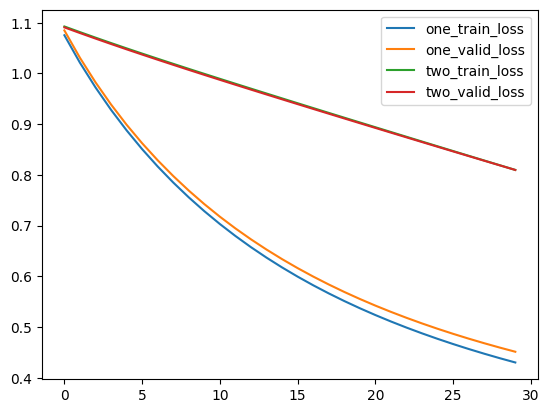

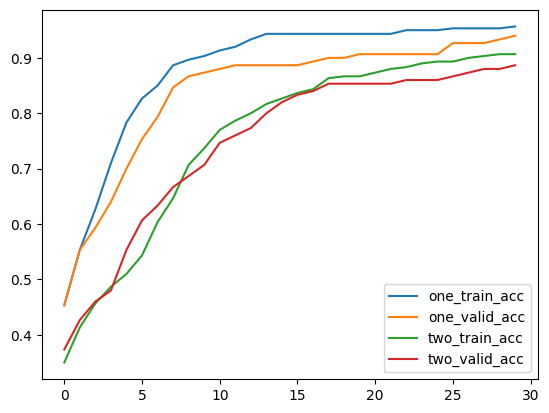

One-layer Network Test Accuracy: 0.9599999785423279
Two-layer Network Test Accuracy: 0.9066666960716248
| epoch  1 | train loss 0.693546 | train acc 0.916667 | valid loss 0.692927 | valid acc 0.906667 |
| epoch  2 | train loss 0.483393 | train acc 0.966667 | valid loss 0.492631 | valid acc 0.933333 |
| epoch  3 | train loss 0.366584 | train acc 0.976667 | valid loss 0.382132 | valid acc 0.946667 |
| epoch  4 | train loss 0.296974 | train acc 0.976667 | valid loss 0.316240 | valid acc 0.940000 |
| epoch  5 | train loss 0.249660 | train acc 0.980000 | valid loss 0.271103 | valid acc 0.960000 |
| epoch  6 | train loss 0.216130 | train acc 0.980000 | valid loss 0.240241 | valid acc 0.953333 |
| epoch  7 | train loss 0.191176 | train acc 0.980000 | valid loss 0.217369 | valid acc 0.960000 |
| epoch  8 | train loss 0.171251 | train acc 0.980000 | valid loss 0.198449 | valid acc 0.960000 |
| epoch  9 | train loss 0.155719 | train acc 0.980000 | valid loss 0.183435 | valid acc 0.966667 |
| epo

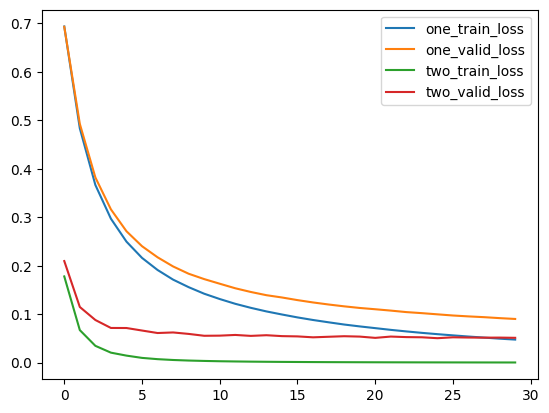

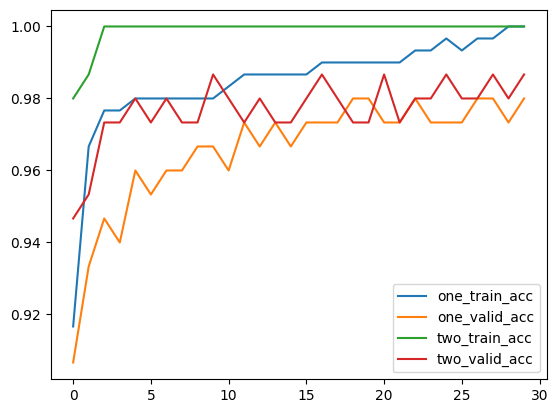

One-layer Network with Adam Test Accuracy: 0.9666666388511658
Two-layer Network with Adam Test Accuracy: 0.9666666388511658


In [65]:
### ========== START ========== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
plt.figure()
plt.plot(one_train_loss, label="one_train_loss")
plt.plot(one_valid_loss, label="one_valid_loss")
plt.plot(two_train_loss, label="two_train_loss")
plt.plot(two_valid_loss, label="two_valid_loss")
plt.legend()
plt.show()

### ========== END ========== ###

### ========== START ========== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
plt.figure()
plt.plot(one_train_acc, label="one_train_acc")
plt.plot(one_valid_acc, label="one_valid_acc")
plt.plot(two_train_acc, label="two_train_acc")
plt.plot(two_valid_acc, label="two_valid_acc")
plt.legend()
plt.show()

### ========== END ========== ##

### ========== START ========== ###
### part k: calculate the test accuracy
one_test_acc = evaluate_acc(model_one, test_loader)
two_test_acc = evaluate_acc(model_two, test_loader)

print(f"One-layer Network Test Accuracy: {one_test_acc}")
print(f"Two-layer Network Test Accuracy: {two_test_acc}")

### ========== END ========== ###

### ========== START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== END ========== ###
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

results_one = train(
    model_one, criterion, optimizer, train_loader, valid_loader, epochs=31
)
print("Finished training OneLayerNetwork!")

model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

results_two = train(
    model_two, criterion, optimizer, train_loader, valid_loader, epochs=31
)
print("Finished training TwoLayerNetwork!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

plt.figure()
plt.plot(one_train_loss, label="one_train_loss")
plt.plot(one_valid_loss, label="one_valid_loss")
plt.plot(two_train_loss, label="two_train_loss")
plt.plot(two_valid_loss, label="two_valid_loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(one_train_acc, label="one_train_acc")
plt.plot(one_valid_acc, label="one_valid_acc")
plt.plot(two_train_acc, label="two_train_acc")
plt.plot(two_valid_acc, label="two_valid_acc")
plt.legend()
plt.show()

one_test_acc = evaluate_acc(model_one, test_loader)
two_test_acc = evaluate_acc(model_two, test_loader)

print(f"One-layer Network with Adam Test Accuracy: {one_test_acc}")
print(f"Two-layer Network with Adam Test Accuracy: {two_test_acc}")